In [1]:
# Importing Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization

In [2]:
import os 
import cv2
import glob
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.models import Sequential
from keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from keras.layers import Convolution2D,Dense,MaxPool2D,Activation,Dropout,Flatten
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D

Alexnet

In [3]:
#Alexnet  architecture using TensorFlow Keras API, consisting of several convolutional, pooling, 
#batch normalization, and fully connected layers, with the specified input shape and number of classes.
# Initializing the CNN
num_classes=3
model = Sequential()
# Convolution Step 1
model.add(Convolution2D(96, 11, strides = (4, 4), padding = 'valid', input_shape=(224, 224, 3), activation = 'relu'))
# Max Pooling Step 1
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
model.add(BatchNormalization())
# Convolution Step 2
model.add(Convolution2D(256, 11, strides = (1, 1), padding='valid', activation = 'relu'))
# Max Pooling Step 2
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding='valid'))
model.add(BatchNormalization())
# Convolution Step 3
model.add(Convolution2D(384, 3, strides = (1, 1), padding='valid', activation = 'relu'))
model.add(BatchNormalization())
# Convolution Step 4
model.add(Convolution2D(384, 3, strides = (1, 1), padding='valid', activation = 'relu'))
model.add(BatchNormalization())
# Convolution Step 5
model.add(Convolution2D(256, 3, strides=(1,1), padding='valid', activation = 'relu'))
# Max Pooling Step 3
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
model.add(BatchNormalization())
# Flattening Step
model.add(Flatten())
# Full Connection Step
model.add(Dense(units = 4096, activation = 'relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(units = 4096, activation = 'relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(units = 1000, activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(units = num_classes, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 27, 27, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 17, 256)       2973952   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 256)        0         
 2D)                                                             
                                                        

In [4]:
#This code imports the ImageDataGenerator class from the Keras library and creates two instances of it, 
#train_datagen and test_datagen, with specified image transformations. The train_datagen instance rescales the pixel 
#values of images to be between 0 and 1, 
#randomly applies shearing, zooming, and horizontal flipping transformations during training.
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
    )
test_datagen=ImageDataGenerator(rescale=1./255)

In [5]:
#will generate batches of image data from the "dataset1/train1" directory with images resized to 224x224 pixels 
#and a batch size of 32, which will be used for validation during model training.
validation_generator = train_datagen.flow_from_directory(
                       "dataset1/train1",
                       target_size=(224, 224),
                       batch_size=32)
     

Found 1008 images belonging to 3 classes.


In [6]:
#two generator objects, train_generator and test_generator, for generating batches of image data during model training and 
#testing.
train_dir=r"E:\new_dataset\train"
test_dir="D:/dataset for project/test"
input_shape=(256,256,3)
train_generator =train_datagen.flow_from_directory(train_dir,target_size=(224,224),batch_size=32)
test_generator=test_datagen.flow_from_directory(test_dir,shuffle=True,target_size=(224,224),batch_size=32)

Found 5163 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [8]:
#It then trains the model using the fit method with the train_generator and validation_generator generator objects as input, for 40 epochs, with a batch size specified by the generator objects, and uses the ReduceLROnPlateau callback to adjust the learning rate when 
#the validation loss plateaus. The training history is stored in the history variable.

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(    
    train_generator,
    steps_per_epoch=None,
    epochs=40,
    validation_data=validation_generator,
    validation_steps=4,
    verbose=1,
    callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.3,patience=3, min_lr=0.000001)],
    shuffle=True)

Epoch 1/40
162/162 [==============================] - 2583s 16s/step - loss: 1.2576 - accuracy: 0.5720 - val_loss: 1.2254 - val_accuracy: 0.4766 - lr: 0.0010
Epoch 2/40
162/162 [==============================] - 2455s 15s/step - loss: 0.8630 - accuracy: 0.6320 - val_loss: 1.1373 - val_accuracy: 0.5938 - lr: 0.0010
Epoch 3/40
162/162 [==============================] - 2339s 14s/step - loss: 0.8023 - accuracy: 0.6643 - val_loss: 0.6765 - val_accuracy: 0.7344 - lr: 0.0010
Epoch 4/40
162/162 [==============================] - 2533s 16s/step - loss: 0.7631 - accuracy: 0.6860 - val_loss: 0.8746 - val_accuracy: 0.7109 - lr: 0.0010
Epoch 5/40
162/162 [==============================] - 2583s 16s/step - loss: 0.7548 - accuracy: 0.6905 - val_loss: 0.8731 - val_accuracy: 0.6172 - lr: 0.0010
Epoch 6/40
162/162 [==============================] - 2553s 16s/step - loss: 0.6949 - accuracy: 0.7211 - val_loss: 0.9321 - val_accuracy: 0.6016 - lr: 0.0010
Epoch 7/40
162/162 [==============================] 

In [9]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(validation_generator)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
32/32 [==============================] - 295s 9s/step - loss: 0.5138 - accuracy: 0.9256
Test Accuracy: 92.5595223903656


In [10]:
results = model.evaluate(test_generator, verbose=1)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))
     

2/2 [==============================] - 15s 10s/step - loss: 0.0697 - accuracy: 1.0000
    Test Loss: 0.06970
Test Accuracy: 100.00%


In [11]:
# Predict the label of the test_gen
pred = model.predict(test_generator,verbose=1)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

2/2 [==============================] - 19s 5s/step


In [ ]:

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#mode

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


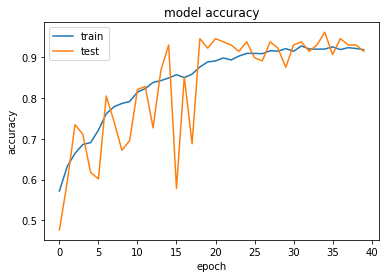

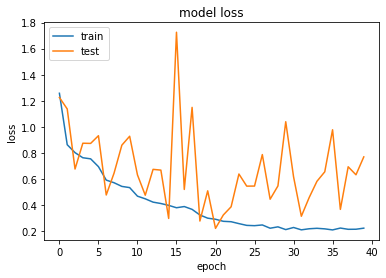

In [12]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy

print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
model.save('New_Alexnet_1.h5')

32/32 [==============================] - 316s 10s/step


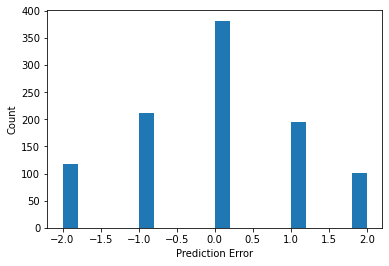

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Get the predicted probabilities for the validation set
y_pred = model.predict(validation_generator)

# Convert the predicted probabilities to class predictions
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = validation_generator.classes

# Calculate the difference between predicted and actual values
errors = y_true - y_pred_classes

# Create a histogram of the errors with 20 bins
plt.hist(errors, bins=20)
plt.xlabel('Prediction Error')
plt.ylabel('Count')
plt.show()